In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import joblib

In [16]:
# Load dataset 1
df1 = pd.read_csv("dataset/dataset-1.csv")
# Load dataset 2
df2 = pd.read_csv("dataset/dataset-2.csv")

In [17]:
df1

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [18]:
df2

,Entity,Code,Year,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders
0,Afghanistan,AFG,1990,895.22565,138.248250,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,893.88434,137.761220,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,892.34973,137.080300,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,891.51587,136.486020,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,891.39160,136.183230,146.58481,23.189074,436.76800
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,546.46204,127.108720,115.32073,20.423056,302.20868
6836,Zimbabwe,ZWE,2016,547.27765,127.142105,114.98700,20.647228,302.68216
6837,Zimbabwe,ZWE,2017,547.62270,127.465050,115.32798,20.791725,302.88626
6838,Zimbabwe,ZWE,2018,546.57184,127.681210,115.42796,20.916480,301.58250


In [19]:
# Rename kolom dataset 1
df1 = df1.rename(columns={
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "schizophrenia_share",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "depression_share",  # ini target (y)
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "anxiety_share",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "bipolar_share",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "eating_share"
})

In [20]:
# Rename kolom dataset 2
df2 = df2.rename(columns={
    "DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders": "depression_dalys",
    "DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia": "schizophrenia_dalys",
    "DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder": "bipolar_dalys",
    "DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders": "eating_dalys",
    "DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders": "anxiety_dalys"
})

In [21]:
# Merge kedua dataset berdasarkan Entity, Code, Year
df_merged = pd.merge(df1, df2, on=["Entity", "Code", "Year"])

In [ ]:
# Drop kolom non-penting (optional)
# Misal: kalau mau prediksi per negara tanpa lihat nama negaranya
df_model = df_merged.drop(columns=["Entity", "Code"])

In [22]:
# Tampilkan hasil akhir siap modeling
print(df_merged.head())

print("Jumlah baris hasil merge :", len(df_merged))

        Entity Code  Year  schizophrenia_share  depression_share  \
0  Afghanistan  AFG  1990             0.223206          4.996118   
1  Afghanistan  AFG  1991             0.222454          4.989290   
2  Afghanistan  AFG  1992             0.221751          4.981346   
3  Afghanistan  AFG  1993             0.220987          4.976958   
4  Afghanistan  AFG  1994             0.220183          4.977782   

   anxiety_share  bipolar_share  eating_share  depression_dalys  \
0       4.713314       0.703023      0.127700         895.22565   
1       4.702100       0.702069      0.123256         893.88434   
2       4.683743       0.700792      0.118844         892.34973   
3       4.673549       0.700087      0.115089         891.51587   
4       4.670810       0.699898      0.111815         891.39160   

   schizophrenia_dalys  bipolar_dalys  eating_dalys  anxiety_dalys  
0            138.24825      147.64412     26.471115      440.33000  
1            137.76122      147.56696     25.54868

In [ ]:
# Simpan hasil ke CSV kalau diperlukan
# df_model.to_csv("merged_ready_for_modeling.csv", index=False)

In [23]:
# Fitur dan target
X = df_merged.drop(columns=['Entity', 'Code', 'Year', 'depression_share'])
y = df_merged['depression_share']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Inisialisasi model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Simpan hasil evaluasi
results = []

# Training dan evaluasi semua model
for name, model in models.items():
    if name in ["Linear Regression"]:  # butuh data scaled
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

# Tampilkan hasil
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("📊 Hasil Evaluasi Model:\n")
print(results_df)

📊 Hasil Evaluasi Model:

               Model       MAE      RMSE  R2 Score
3           CatBoost  0.011956  0.018535  0.999633
1      Random Forest  0.009732  0.019391  0.999598
2            XGBoost  0.010539  0.019723  0.999584
0  Linear Regression  0.040027  0.057373  0.996479


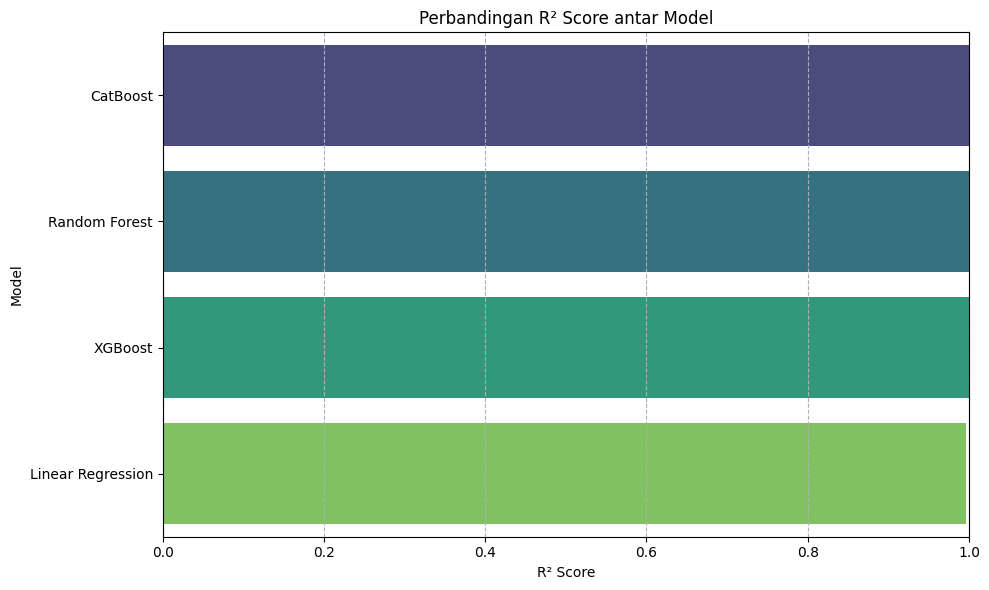

In [27]:
# Visualisasi perbandingan R² Score
plt.figure(figsize=(10, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")
plt.title("Perbandingan R² Score antar Model")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

In [29]:
# Simpan model CatBoost
joblib.dump(models["CatBoost"], "best_model_catboost.pkl")

['best_model_catboost.pkl']

In [31]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']